In [47]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# What to add 5.29.2023:
- SMOTE (oversample churn data)
- Dummy out the area code (could regions within state be better than state as a predictor?)


In [33]:
pd.read_csv("Raw_Data/Churn_Data.csv")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Load the dataset into a Pandas DataFrame:

In [34]:
data = pd.read_csv("Raw_Data/Churn_Data.csv")

In [35]:
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Define the features (X) and the target variable (y):

In [36]:
X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target variable

# Convert categorical variables into numerical form using one-hot encoding (if necessary):

In [37]:
X_encoded = pd.get_dummies(X, columns=['state', 'international plan', 'voice mail plan'])

In [41]:
X_encoded = X_encoded.drop(columns='phone number')

# Split the data into training and testing sets:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier and fit the model on the training data:

In [43]:
X_train

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,243,510,0,95.5,92,16.24,163.7,63,13.91,264.2,...,0,0,0,0,0,0,1,0,1,0
1373,108,415,0,112.0,105,19.04,193.7,110,16.46,208.9,...,0,0,0,0,0,0,1,0,1,0
679,75,415,0,222.4,78,37.81,327.0,111,27.80,208.0,...,0,0,0,0,0,0,0,1,1,0
56,141,415,0,126.9,98,21.57,180.0,62,15.30,140.8,...,0,0,0,0,0,0,1,0,1,0
1993,86,510,0,216.3,96,36.77,266.3,77,22.64,214.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,510,0,274.4,120,46.65,198.6,82,16.88,160.8,...,0,0,0,0,0,0,1,0,1,0
1130,122,415,0,35.1,62,5.97,180.8,89,15.37,251.6,...,0,0,0,0,0,0,1,0,1,0
1294,66,408,0,87.6,76,14.89,262.0,111,22.27,184.6,...,0,0,0,0,0,0,1,0,1,0
860,169,415,0,179.2,111,30.46,175.2,130,14.89,228.6,...,0,0,0,0,0,0,1,0,1,0


In [44]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Make predictions on the test set:

In [45]:
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model:

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9325337331334332


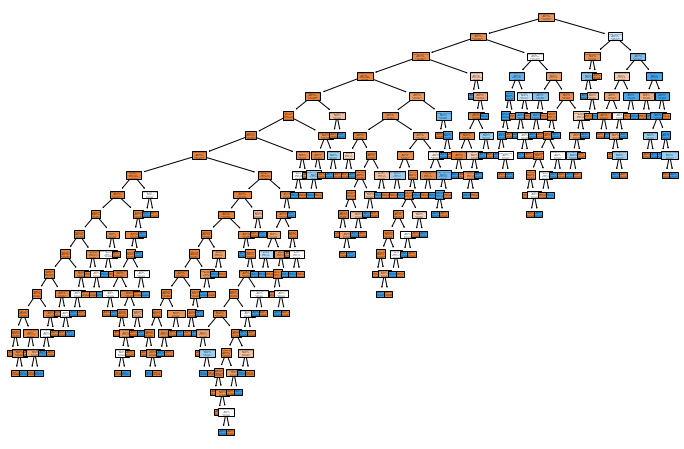

In [48]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X_encoded.columns, class_names=['False', 'True'], filled=True)
plt.show()

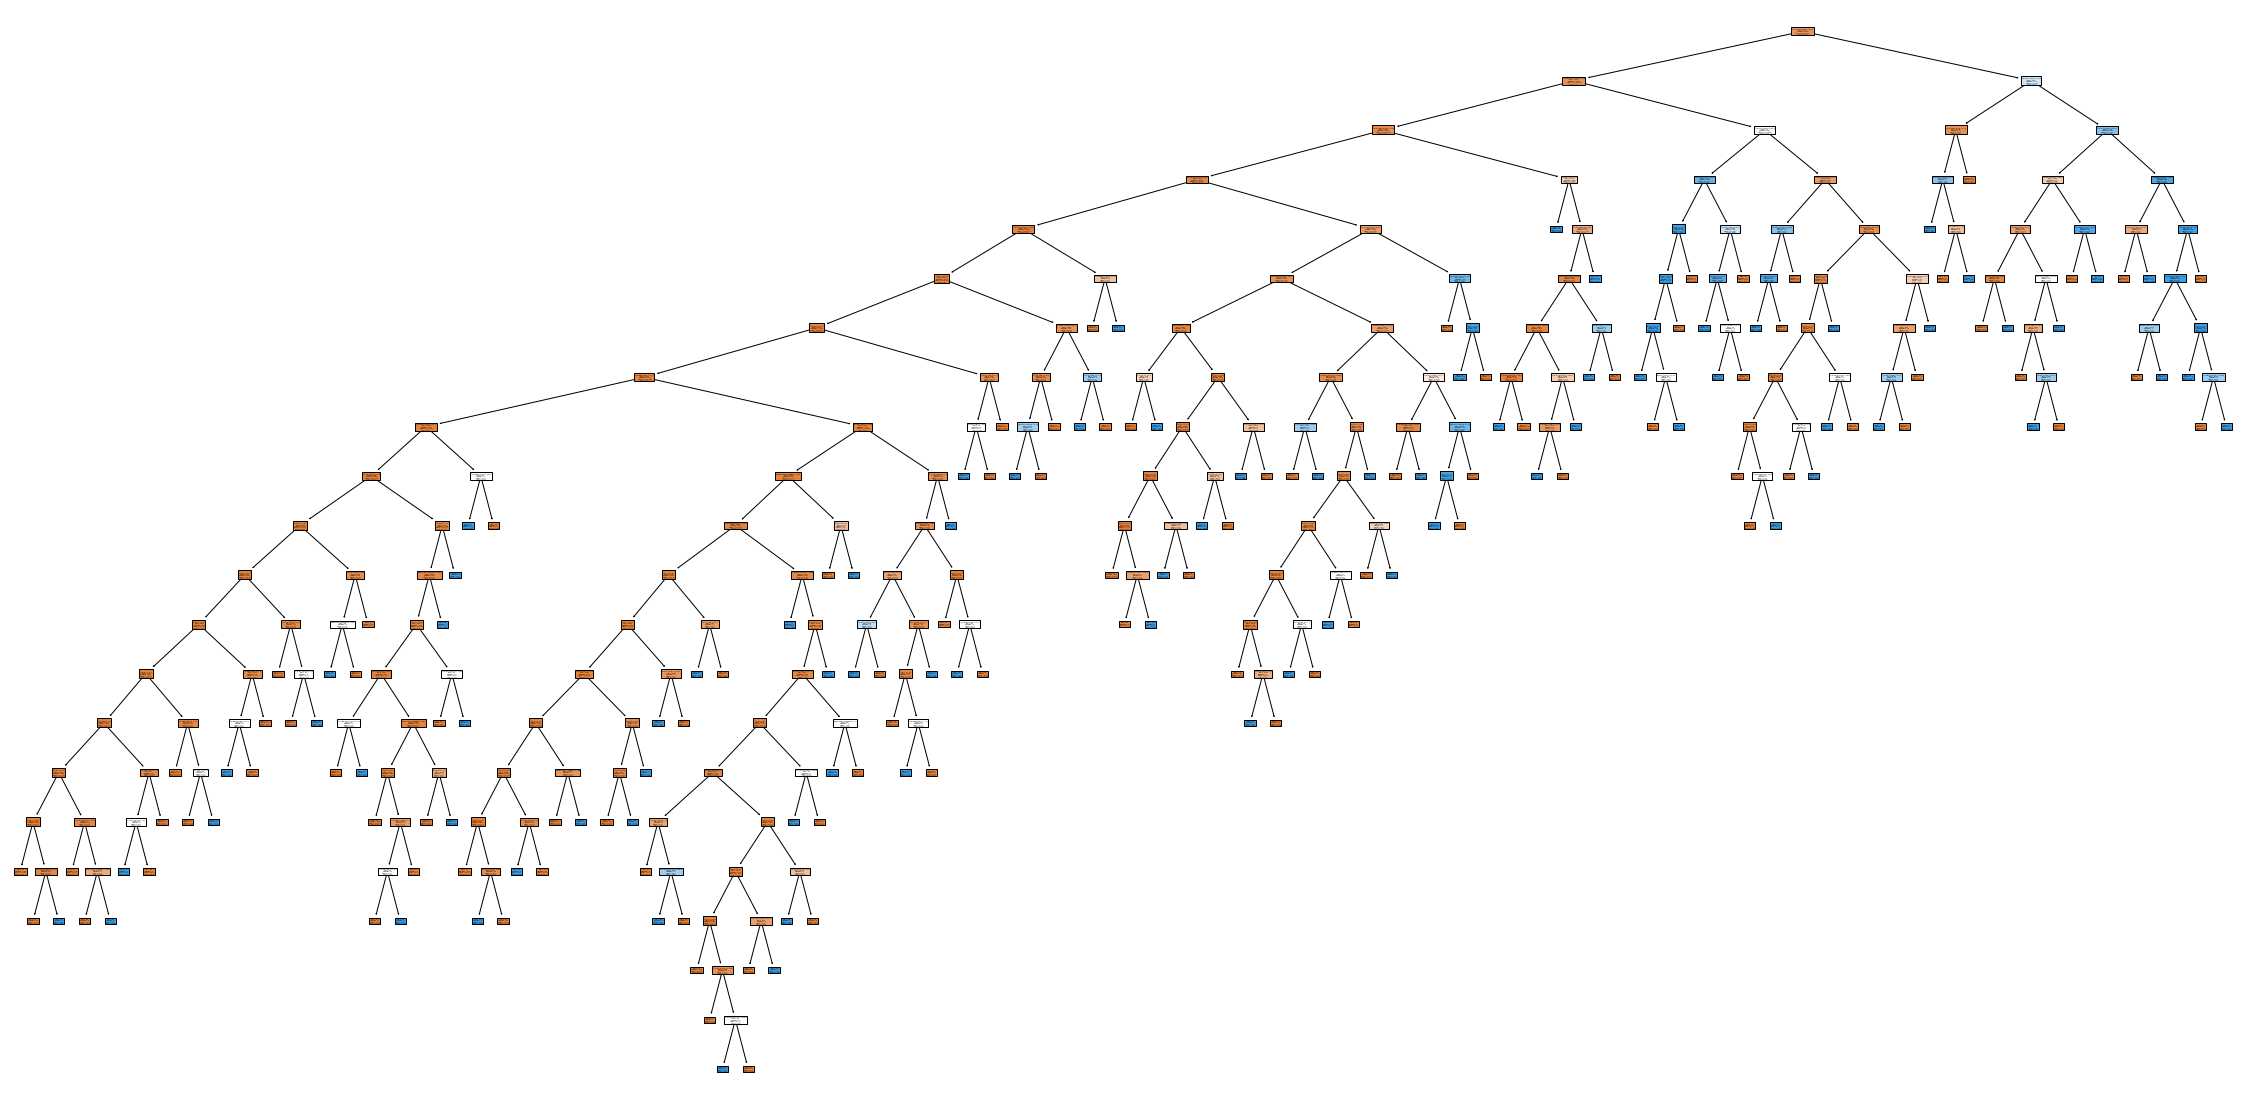

In [75]:
plt.figure(figsize=(40, 20))
plot_tree(model, feature_names=X_encoded.columns, class_names=['False', 'True'], filled=True)
plt.show()

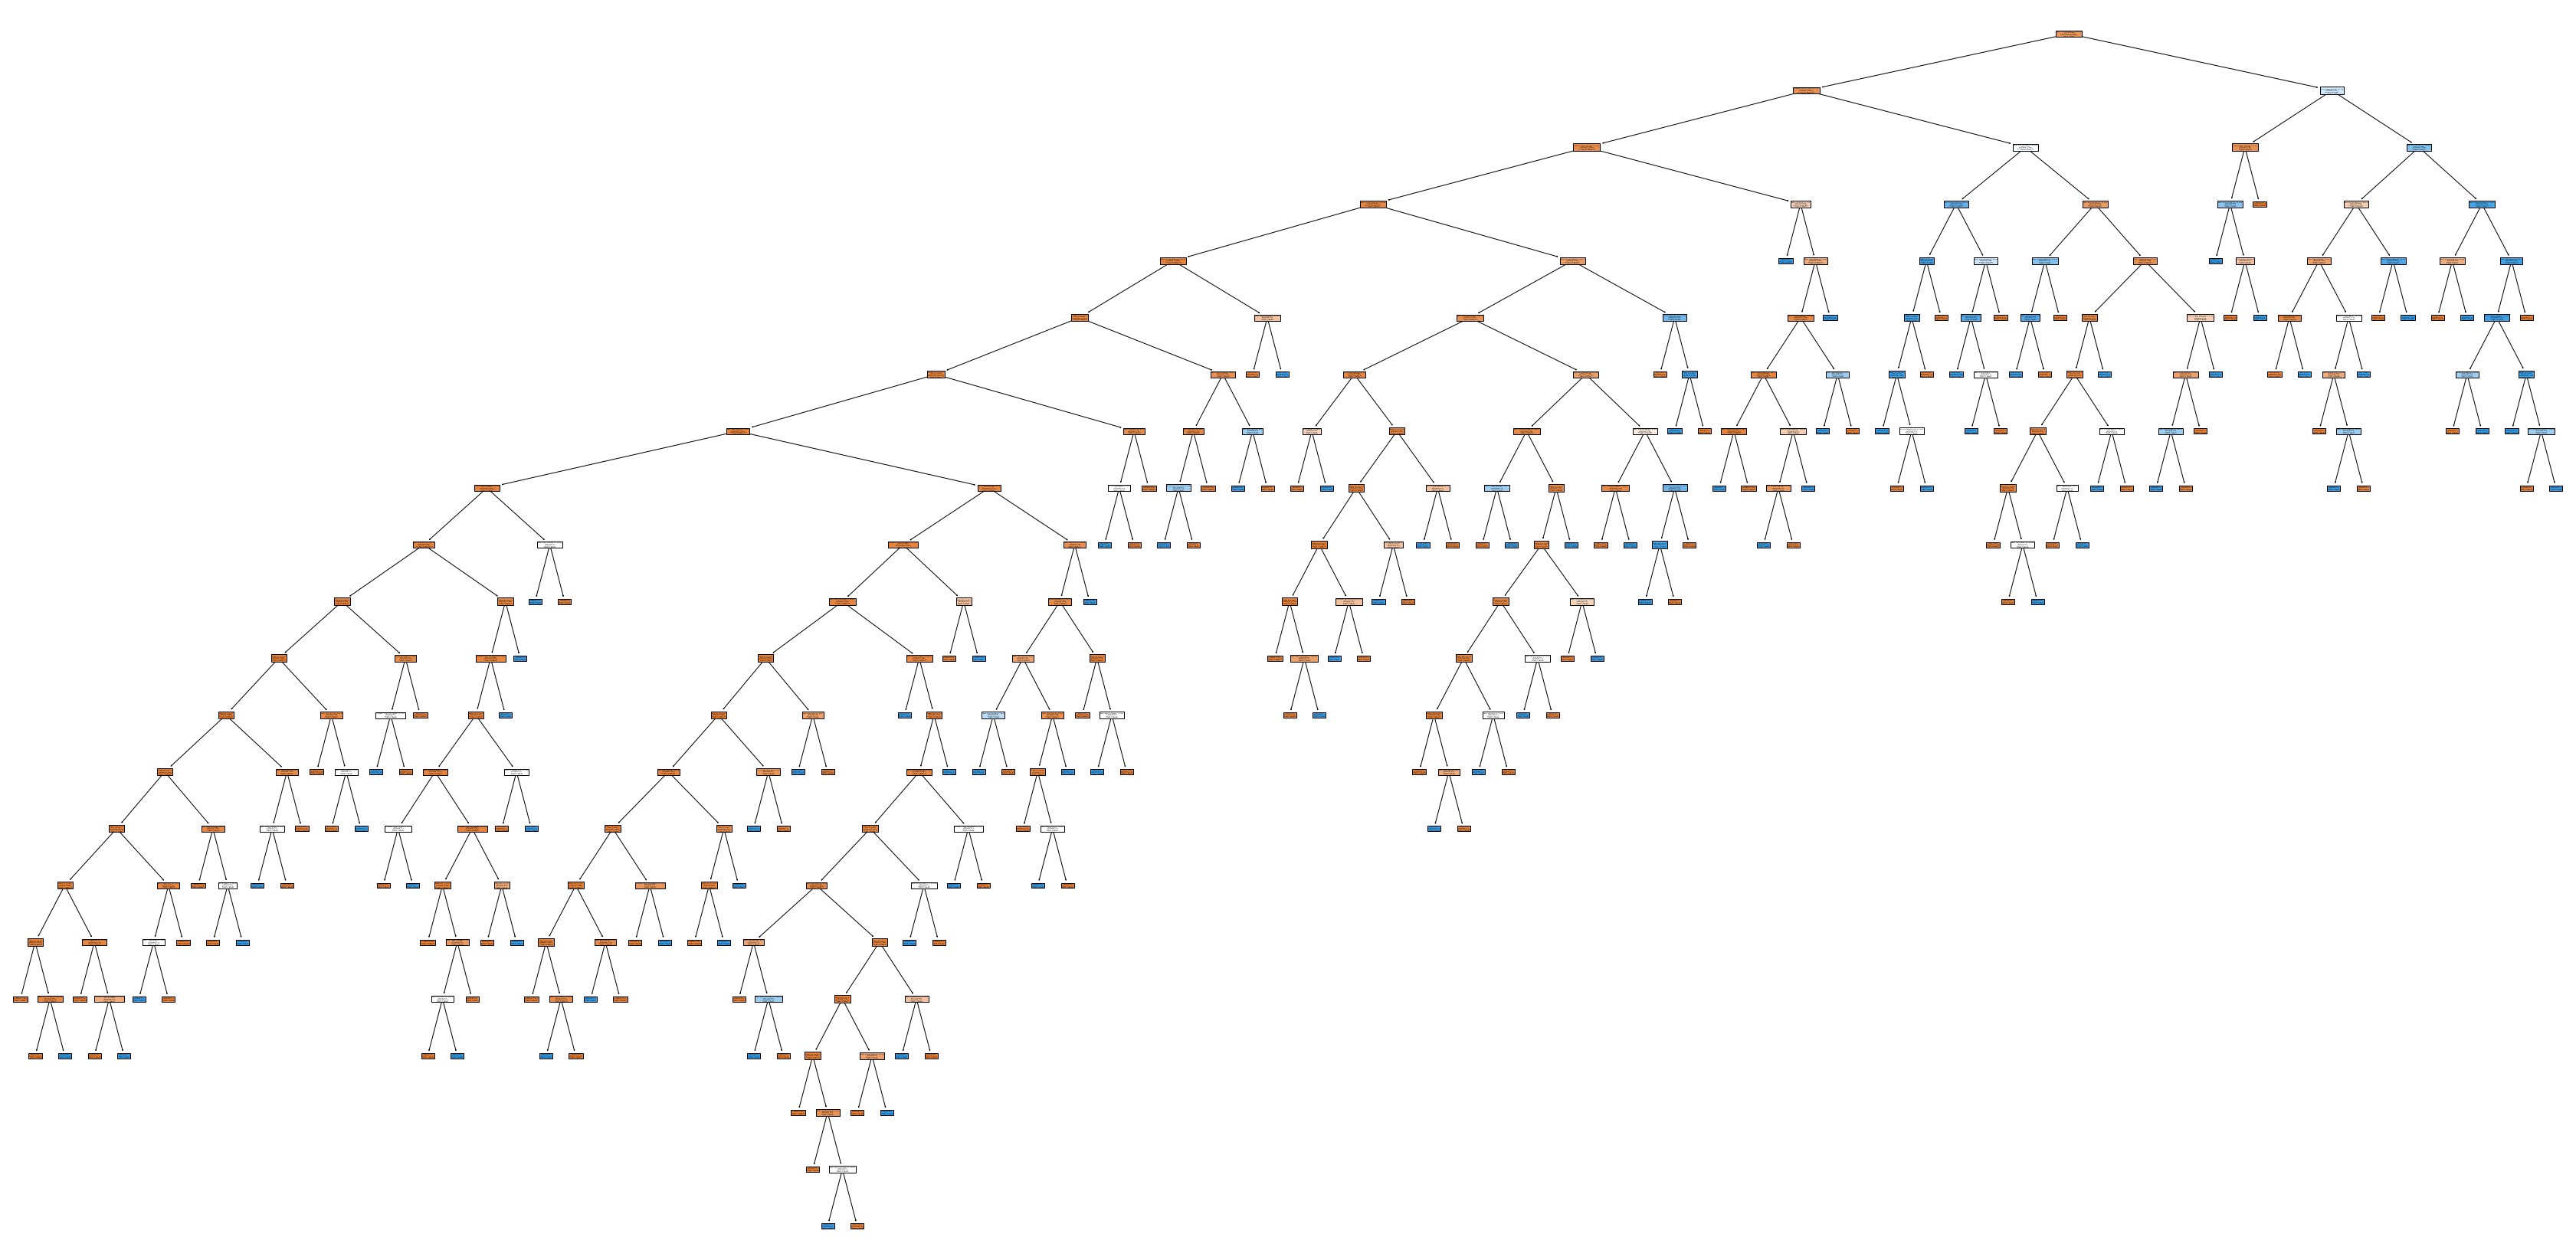

In [76]:
plt.figure(figsize=(60, 30))
plot_tree(model, feature_names=X_encoded.columns, class_names=['False', 'True'], filled=True)
plt.show()

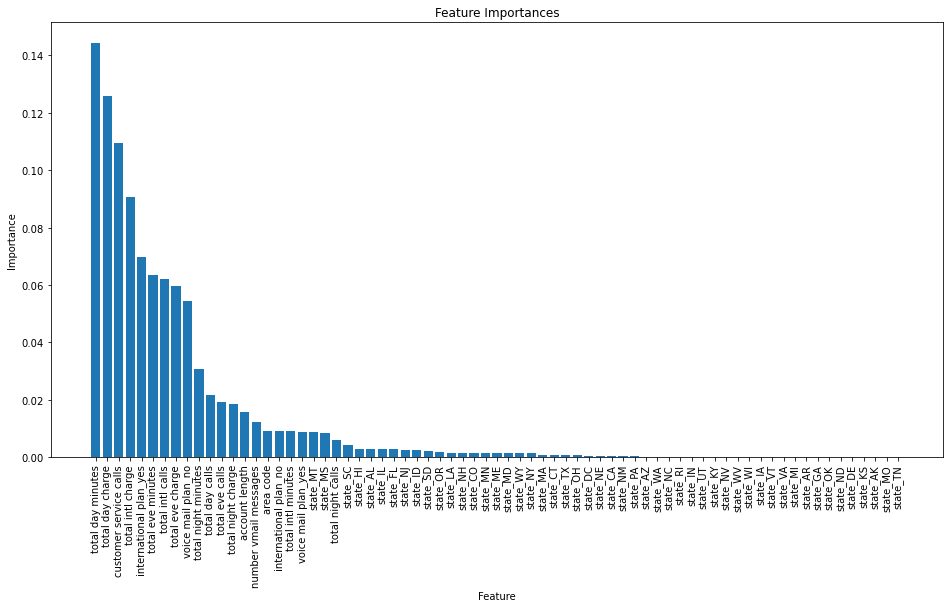

In [64]:
# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create bar plot of feature importances
plt.figure(figsize=(16, 8))
plt.bar(range(X_encoded.shape[1]), importances[indices])
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

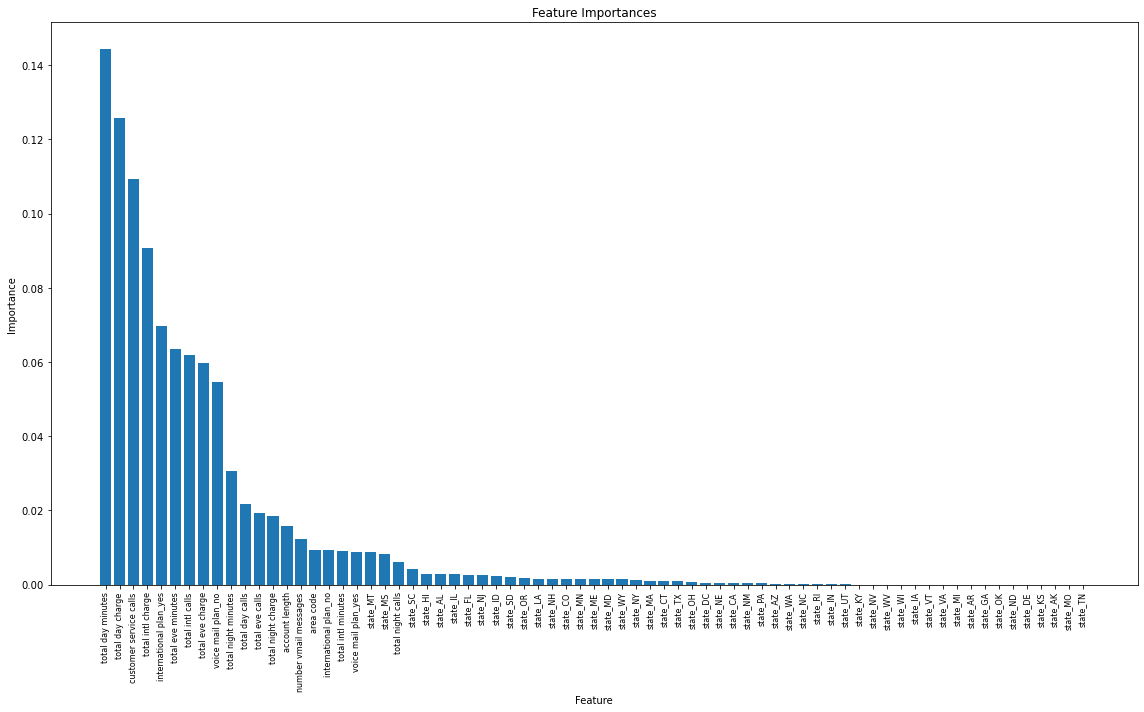

In [73]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(16, 10))
plt.bar(range(X_encoded.shape[1]), importances[indices])
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], fontsize=8, rotation=90) 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [56]:
def print_decision_rules(tree, feature_names, class_names, node_index=0, pad=""):
    left_child = tree.tree_.children_left[node_index]
    right_child = tree.tree_.children_right[node_index]

    if left_child == -1 and right_child == -1:
        # Leaf node reached
        class_label = class_names[np.argmax(tree.tree_.value[node_index])]

        print(pad + "Class:", class_label)
        return

    feature_index = tree.tree_.feature[node_index]
    threshold = tree.tree_.threshold[node_index]
    feature_name = feature_names[feature_index]

    print(pad + "if", feature_name, "<=", threshold, "then:")
    print_decision_rules(tree, feature_names, class_names, left_child, pad + "  ")

    print(pad + "if", feature_name, ">", threshold, "then:")
    print_decision_rules(tree, feature_names, class_names, right_child, pad + "  ")

# Display decision rules of the trained decision tree model
print_decision_rules(model, X_encoded.columns, ['False', 'True'])

if total day minutes <= 263.5500030517578 then:
  if customer service calls <= 3.5 then:
    if international plan_yes <= 0.5 then:
      if total day minutes <= 223.25 then:
        if total eve minutes <= 341.1499938964844 then:
          if state_TX <= 0.5 then:
            if state_DC <= 0.5 then:
              if total night calls <= 104.5 then:
                if total night charge <= 15.910000324249268 then:
                  if total day calls <= 124.5 then:
                    if state_NC <= 0.5 then:
                      if state_IN <= 0.5 then:
                        if state_RI <= 0.5 then:
                          if state_MN <= 0.5 then:
                            if state_ME <= 0.5 then:
                              if state_LA <= 0.5 then:
                                if state_UT <= 0.5 then:
                                  Class: False
                                if state_UT > 0.5 then:
                                  if total day charge <= 36.165000915

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       566
        True       0.80      0.73      0.77       101

    accuracy                           0.93       667
   macro avg       0.88      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
[[548  18]
 [ 27  74]]
